<a href="https://colab.research.google.com/github/B1501/Charitha_INFO5502_Spring2022/blob/main/lab_assignment_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The sixth Lab-assignment (03/24/2022, 50 points in total)

The purpose of this exercise is to build a simple predicition model which can helpyou understand the workflow of machine learning. 

### Task Decription 

The goal of this assignment is to predict bike share use, given the hour, day, and information about the weather. Companies like Divvy try to predict how much demand there will be for bikes on any given day to allocate resources to redistribute bikes so that, ideally, very few bike stations are ever full (when you can’t park your bike) or empty (when you can’t pick up a bike if you want to).

The data (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06) in Github provides detailed information on the data set and necessary downloads.

### Data Description

You are provided hourly rental data spanning two years (link: https://github.com/unt-iialab/info5502-spring2022/tree/main/datasets/lab_assignment_06). For this task, the training set is comprised of the first 16 days of each month, while the test set is the 17-19th day of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period. That is, predict "count" without using "count" or its components "casual" and "registered".

Data Fields

datetime - hourly date + timestamp

season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather -

1 - Clear, Few clouds, Partly cloudy, Partly cloudy

2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp - temperature in Celsius

atemp - "feels like" temperature in Celsius

humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

### Output

Submission Format

Your output (a separate file) must have a header line and should be structured in the following format:

 datetime,count
 
 2011-01-20 00:00:00,0 
 
 2011-01-20 01:00:00,0
 
 2011-01-20 02:00:00,0
 
 ...
 
The tutorial code should demonstrate how to generate such a file from a very simple prediction model. Note, these prediction are to be done on the test file under the data tab, where you do not know the actual count, and should match the rows of the test file in count and order.

Your predictions should be compared to the ground truth information (sample_prediction.csv). Score are calculated using Root Mean Squared Error (RMSE).

### Tips

●	Add features: Pick columns/features from the data you already have. Or make a new feature from the ones you have. For example, the tutorial makes ‘hour’ from the datetime stamp, which seemed very useful. How about ‘month’?

●	Model selection: Try different models. Make sure they are regression models rather than classification models. Tip: random forest regression is a good, all around modeling strategy on complicated data sets.

●	Model tuning: Almost all regression models have parameters to tune (“hyperparameters”). E.g. polynomial regression has the degree of the polynomial (n = 1 for a line, n=2 for a quadratic fit, n=3 for a cubic fit…). Generally, one extreme makes the model too simple (e.g. a line for a curved set of points) and the other extreme makes the model overfit/be too complex, and usually the right choice is in between. For some models it is obvious what to tune (e.g. k for k nearest neighbors regression) and some don’t need much tuning with defaults that often work well. e.g. try changing the number of trees used in the random forest model!

●	Cross validation: The tutorial has a simple way of separating training and test data, however, there are better ways of splitting training and test data. Look into cross validation techniques, which are more reliable than an arbitrary split of training and test data.

●	Separate models for ...: Notice that count comes from just adding casual riders and registered riders. However, what if these two types of riders acted very differently? It might make sense to make two separate models and just add the results of both models together. This is also true for any subsets of your data that may behave wildly differently (e.g. create a separate model for each season?)

### Your code

In [28]:
### You code here:
import pandas as pd
train_bike_share=pd.read_csv("/content/train_luc.csv",header=0)
train_bike_share

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9169,2012-12-16 19:00:00,4,0,0,1,14.76,17.425,93,8.9981,10,99,109
9170,2012-12-16 20:00:00,4,0,0,2,15.58,19.695,82,0.0000,14,108,122
9171,2012-12-16 21:00:00,4,0,0,2,14.76,18.940,93,0.0000,14,92,106
9172,2012-12-16 22:00:00,4,0,0,2,16.40,20.455,82,12.9980,6,83,89


In [4]:
#print the samples and features in the train dataset
print("The number of samples:",train_bike_share.shape[0])
print("The number of features:",train_bike_share.shape[1])

The number of samples: 9174
The number of features: 12


In [65]:
#importing the datetime package to extract the hour,day,month
from datetime import datetime
# Here we are transforming the datetime column from datetime datatype
train_bike_share['datetime']=pd.to_datetime(train_bike_share.datetime)
# we are separting the hour,day,month using dt function from datetime
train_bike_share['hour'] = train_bike_share['datetime'].dt.hour
train_bike_share['day'] = train_bike_share['datetime'].dt.day
train_bike_share['month'] = train_bike_share['datetime'].dt.month
train_bike_share.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [7]:
#printing the columns and rows in the dataset
train_bike_share.shape

(9174, 12)

In [9]:
#checking the missing values if there is any
train_bike_share.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
#printing the detailed information about columns and dtype
train_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9174 entries, 0 to 9173
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    9174 non-null   datetime64[ns]
 1   season      9174 non-null   int64         
 2   holiday     9174 non-null   int64         
 3   workingday  9174 non-null   int64         
 4   weather     9174 non-null   int64         
 5   temp        9174 non-null   float64       
 6   atemp       9174 non-null   float64       
 7   humidity    9174 non-null   int64         
 8   windspeed   9174 non-null   float64       
 9   casual      9174 non-null   int64         
 10  registered  9174 non-null   int64         
 11  count       9174 non-null   int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 860.2 KB


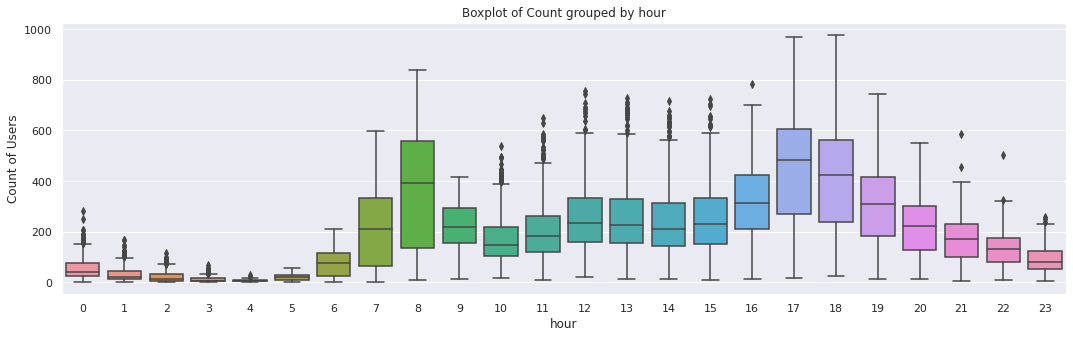

In [37]:
#we are making the box plot based on the hour and count of users
import seaborn as sns
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x=train_bike_share['hour'], y=train_bike_share['count'], ax=ax)
ax.set_ylabel('Count of Users')
ax.set_title("Boxplot of Count grouped by hour");

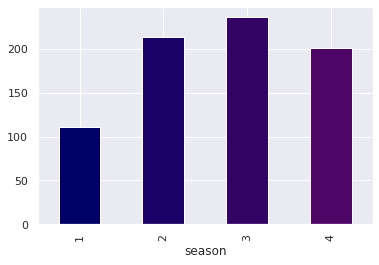

In [35]:
#comparing the season and count and plotting the graph
import matplotlib.pyplot as plt
my_colors = [(x/10, x/150.0, 0.4) for x in range(5)]
train_bike_share.groupby("season")["count"].mean().plot.bar(color =my_colors)

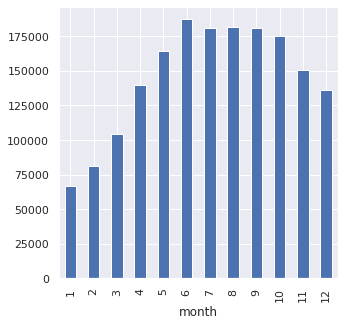

In [36]:
#plotting the graph and comparing with the month and count to better understand the data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
train_bike_share.groupby(["month"])["count"].sum().plot.bar()

In [49]:
#first,import the packages to perform the  
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#adding the extra features in the cols like hour,day,temp,weather,month
cols = ['hour','day','temp','weather','month'] 
cols_t = train_bike_share[cols]
count_pre = preprocessing.scale(cols_t) 
# we are using count column from the data to model the train and test set
y_count = train_bike_share['count'].values
pre_count = preprocessing.scale(y_count) 
w_sc = train_bike_share['casual'].values
w_pre= preprocessing.scale(w_sc)
z_share = train_bike_share['registered'].values
z_preprosing = preprocessing.scale(z_share)
#we are splitting the data into train and test data in train dataset
X_training,X_testing,y_training,y_testing = train_test_split(count_pre,pre_count,test_size=0.2,random_state=0)
X_train_casnon,X_test_casnon,w_trainset,w_testset = train_test_split(count_pre,w_pre,test_size=0.2,random_state=0)
X_train_regis,X_test_regis,z_trainset,z_testset = train_test_split(count_pre,z_preprosing,test_size=0.2,random_state=0)

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 500, 1000]
}
# Creating a model 
pre_model = RandomForestRegressor()
# initiating the gridsearch model to predict the randomregression model
grid_mod = GridSearchCV(estimator = pre_model, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)
grid_mod.fit(X_training, y_training)
grid_mod.best_params_

Fitting 2 folds for each of 288 candidates, totalling 576 fits


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [75]:
#importing the packages and using Random forest regression model
from sklearn.ensemble import RandomForestRegressor
predict_model= RandomForestRegressor(max_depth=110,n_estimators = 100 )
print("Adding extra features to predict the model:",cols)
print(predict_model) # to get an idea of parameters and confirm model chosen

Adding extra features to predict the model: ['hour', 'day', 'temp', 'weather', 'month']
RandomForestRegressor(max_depth=110)


The Root Mean Square error: 0.5718021504532891


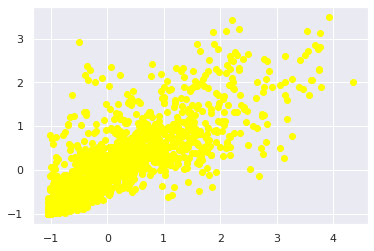

In [61]:
# fitting the model with the subset of training of original training data
predict_model.fit(X_training, y_training)
predict_model.fit(X_train_casnon, w_trainset)
predict_model.fit(X_train_regis, z_trainset)
ct_predict = predict_model.predict(X_testing)

#importing the packages using sklearn to predict the rms value and random regression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#creating the logic to find the rms error value using predict count and the y testing
rms_error = np.sqrt(mean_squared_error(y_testing,ct_predict))
print("The Root Mean Square error:",rms_error)
#plotting the scatter to better understand the data and analyze
plt.scatter(y_testing,ct_predict,c='yellow')
plt.show()

In [73]:
#here, we are loading the test data and the sample output data
import pandas as pd
test_bike_share = pd.read_csv('/content/test_luc.csv', header=0)
sample_df=pd.read_csv('/content/sample_output (1).csv')
#we are finding the samples and features by taking the test data
print("\n The Number of samples:",test_bike_share.shape[0])
print("\n The Number of features: ",test_bike_share.shape[1])

# we are adding the new feature into the test data, to use it in prediction

test_bike_share['datetime']=pd.to_datetime(train_bike_share.datetime)

test_bike_share['hour'] = test_bike_share['datetime'].dt.hour
test_bike_share['day'] = test_bike_share['datetime'].dt.day
test_bike_share['month'] = test_bike_share['datetime'].dt.month
# print the test data output to be perfect to read in correctly and added the column
test_bike_share.head()

# we are fitting the tarin data to best fit the model
predict_model.fit( train_bike_share[cols], train_bike_share['count'])
predict_model.fit(train_bike_share[cols], train_bike_share['casual'])
predict_model.fit(train_bike_share[cols], train_bike_share['registered'])

# applying to the test data 
# (not the "test set" you used for model selection and tuning)
pred_count = predict_model.predict(test_bike_share[cols])
casual_count=predict_model.predict(test_bike_share[cols])
registered_count=predict_model.predict(test_bike_share[cols])


# add the prediction column (in case you want to inspect it later)
test_bike_share['casual']=casual_count
test_bike_share['registered']=registered_count
test_bike_share['count'] = pred_count
test_bike_share['added_predict_count']=test_bike_share['casual']+test_bike_share['registered']

print(test_bike_share)

rmserror_value = np.sqrt(mean_squared_error(sample_df['count'],test_bike_share['count']))
print("The RMS error:",rmserror_value)

rms_by_adding=np.sqrt(mean_squared_error(sample_df['count'],test_bike_share['added_predict_count']))
print("The RMS error taken by adding:",rms_by_adding)

normalized_rmse_value=rmserror_value/(test_bike_share['count'].max()-test_bike_share['count'].min())
print("The normalized_rmse is :", normalized_rmse_value)

# save the predicted count as a csv with a header column and datetime row
test_bike_share = test_bike_share[['datetime','count']].to_csv('predict_output.csv', 
    index=False, header=True)

print("Prediction completed. Save as predict_output.csv")


 The Number of samples: 1712

 The Number of features:  9
                datetime  season  holiday  workingday  weather   temp   atemp  \
0    2011-01-01 00:00:00       1        1           0        2   8.20   9.850   
1    2011-01-01 01:00:00       1        1           0        2   8.20   9.850   
2    2011-01-01 02:00:00       1        1           0        2   7.38   8.335   
3    2011-01-01 03:00:00       1        1           0        2   7.38   9.090   
4    2011-01-01 04:00:00       1        1           0        2   7.38   9.850   
...                  ...     ...      ...         ...      ...    ...     ...   
1707 2011-05-09 11:00:00       4        0           1        1  15.58  19.695   
1708 2011-05-09 12:00:00       4        0           1        1  14.76  17.425   
1709 2011-05-09 13:00:00       4        0           1        1  13.94  15.910   
1710 2011-05-09 14:00:00       4        0           1        1  13.94  17.425   
1711 2011-05-09 15:00:00       4        0         